# Assignment 3 - Visualization

In this assignment, you work in the groups you already are divided into. you need to define at least one task based on each of the exercises 2, 3 and 9. All together three tasks. You have to apply the tasks on the same dataset that you used in Assignment 1 and 2. 

You will hand in the assignment through a Jupyter notebook, along with your environment and the dataset you picked, both zipped together and submitted as one file. Please name your file so that it contains your group number. It is important that you clearly state the tasks you are performing on the dataset as questions or something similar in the notebook before you do the operations on the data. Also make sure to document your solutions and your thinking so that it can easily be followed. If you fail to do these things you may not pass this assignment.

The deadline of this assignment is on May 10, 2025 to get bonus points, or before the exam (in which case no bonus points are awarded).

Re-submission 1 is by the end of week 33, 2025.

Re-submission 2 is by the end of week 2, 2026.

## Exercise 2 task:
- Data cleaning
- Plotting data distributions
- Plotting relationships between variables
- Plotting categorical data
- Plotting time series data

## Exercise 3 task:
- Controlling figure aesthetics (on a line plot)
- Controlling figure aesthetics (on categorical plots & facet grids)

- - - 
## Imports and get data

In [592]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


In [593]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [594]:
df = pd.read_csv(
    "../Total air emissions by greenhouse gas.csv",
    na_values=['..']
    )
df

,greenhouse gas,sector,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, excluding in...",71203.3,71338.8,71022.5,71242.7,73749.3,73135.2,77030.2,72145.4,...,53481.9,53283.7,53198.3,52294.3,51434.3,50196.4,45981.9,47721.8,45215.4,44386.0
1,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, including in...",74942.3,75103.8,74935.1,75408.3,78554.0,78019.4,82142.9,78075.2,...,61492.3,61348.7,62200.6,62518.3,60125.1,60011.4,55346.9,56335.5,54146.8,51956.4
2,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, excluding in...",11863.2,12988.4,13579.8,17635.4,18592.5,17858.9,19616.0,13375.8,...,-4299.4,-2033.0,756.6,5922.3,11653.5,10429.0,6630.6,11055.3,11601.4,13162.4
3,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, including in...",15602.2,16753.4,17492.4,21801.0,23397.2,22743.1,24728.6,19305.6,...,3710.9,6032.1,9758.9,16146.3,20344.3,20244.0,15995.5,19669.1,20532.8,20732.8
4,Total Greenhouse Gases (kt CO2-eqv.),"OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL",3682.5,3773.5,4176.6,3930.2,3962.2,3747.9,3605.7,3636.9,...,2971.8,2990.7,2791.1,2760.0,2659.3,2823.8,2828.2,2889.0,2592.0,2705.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"INTERNATIONAL TRANSPORT, TOTAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"AGRICULTURE, TOTAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"SOLVENT USE AND OTHER PRODUCT USE, TOTAL",81.4,81.6,81.4,78.1,82.2,111.0,87.5,121.3,...,31.1,37.0,38.8,34.0,34.0,35.3,38.2,39.6,38.6,38.0
152,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"HEATING OF HOUSES AND PREMISES, TOTAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning
There is a lot of missing values and different units of measure. We should get rid of the columns with missing values and get some insight on the data. Pivoting it and using greenhouse gas + sector as column might be a good idea.

In [595]:
print(df.isna().sum())

greenhouse gas     0
sector             0
1990              42
1991              41
1992              41
1993              41
1994              41
1995              40
1996              40
1997              40
1998              39
1999              39
2000              39
2001              39
2002              39
2003              38
2004              38
2005              39
2006              39
2007              39
2008              39
2009              39
2010              39
2011              39
2012              38
2013              38
2014              39
2015              39
2016              39
2017              38
2018              39
2019              39
2020              40
2021              40
2022              40
2023              40
dtype: int64


We can see that a lot of data is missing in nearly every column. That's because often all the row is missing.

In [596]:
df.dropna()

,greenhouse gas,sector,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, excluding in...",71203.3,71338.8,71022.5,71242.7,73749.3,73135.2,77030.2,72145.4,...,53481.9,53283.7,53198.3,52294.3,51434.3,50196.4,45981.9,47721.8,45215.4,44386.0
1,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, including in...",74942.3,75103.8,74935.1,75408.3,78554.0,78019.4,82142.9,78075.2,...,61492.3,61348.7,62200.6,62518.3,60125.1,60011.4,55346.9,56335.5,54146.8,51956.4
2,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, excluding in...",11863.2,12988.4,13579.8,17635.4,18592.5,17858.9,19616.0,13375.8,...,-4299.4,-2033.0,756.6,5922.3,11653.5,10429.0,6630.6,11055.3,11601.4,13162.4
3,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, including in...",15602.2,16753.4,17492.4,21801.0,23397.2,22743.1,24728.6,19305.6,...,3710.9,6032.1,9758.9,16146.3,20344.3,20244.0,15995.5,19669.1,20532.8,20732.8
4,Total Greenhouse Gases (kt CO2-eqv.),"OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL",3682.5,3773.5,4176.6,3930.2,3962.2,3747.9,3605.7,3636.9,...,2971.8,2990.7,2791.1,2760.0,2659.3,2823.8,2828.2,2889.0,2592.0,2705.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, excluding in...",104.9,105.8,105.7,102.4,109.6,139.3,120.5,164.5,...,47.3,54.8,59.2,47.2,34.0,35.3,38.2,39.6,38.6,38.0
141,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, including in...",104.9,105.8,105.7,102.4,109.6,139.3,120.5,164.5,...,47.3,54.8,59.2,47.2,34.0,35.3,38.2,39.6,38.6,38.0
142,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, excluding in...",104.9,105.8,105.7,102.4,109.6,139.3,120.5,164.5,...,47.3,54.8,59.2,47.2,34.0,35.3,38.2,39.6,38.6,38.0
143,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, including in...",104.9,105.8,105.7,102.4,109.6,139.3,120.5,164.5,...,47.3,54.8,59.2,47.2,34.0,35.3,38.2,39.6,38.6,38.0


We lost 44 rows which is 28% of our dataset.

As there is different unit by row .describe() would be meaningless so let's transpose the dataframe.

In [597]:
# Create new column with greenhouse gas and sector
df['new_column'] = df['greenhouse gas'] + ' - ' + df['sector']
df = df.drop(columns=['greenhouse gas', 'sector'])

In [598]:
# Transpose the DataFrame
df_t = df.T

# Set tnew columns
df_t.columns = df_t.iloc[-1]
df_t = df_t[:-1]
df_t

new_column,"Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, excluding international transports)","Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, including international transports)","Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, excluding international transports)","Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, including international transports)","Total Greenhouse Gases (kt CO2-eqv.) - OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - WASTE, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - ELECTRICITY AND DISTRICT HEATING, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - INDUSTRY, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - DOMESTIC TRANSPORT, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - INTERNATIONAL TRANSPORT, TOTAL",...,"Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - WASTE, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - ELECTRICITY AND DISTRICT HEATING, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - INDUSTRY, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - DOMESTIC TRANSPORT, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - INTERNATIONAL TRANSPORT, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - AGRICULTURE, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - SOLVENT USE AND OTHER PRODUCT USE, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - HEATING OF HOUSES AND PREMISES, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - LAND-USE, LAND-USE CHANGE AND FORESTRY (LULUCF), TOTAL"
1990,71203.3,74942.3,11863.2,15602.2,3682.5,4275.1,6414.3,20635.6,19319.7,3739.0,...,NaN,NaN,NaN,23.5,NaN,NaN,NaN,81.4,NaN,NaN
1991,71338.8,75103.8,12988.4,16753.4,3773.5,4348.1,7383.4,20329.4,19183.7,3765.0,...,NaN,NaN,NaN,24.3,NaN,NaN,NaN,81.6,NaN,NaN
1992,71022.5,74935.1,13579.8,17492.4,4176.6,4361.5,7863.7,19006.7,20092.2,3912.6,...,NaN,NaN,NaN,24.3,NaN,NaN,NaN,81.4,NaN,NaN
1993,71242.7,75408.3,17635.4,21801.0,3930.2,4227.9,7750.7,20169.9,19324.1,4165.6,...,NaN,NaN,NaN,24.3,NaN,NaN,NaN,78.1,NaN,NaN
1994,73749.3,78554.0,18592.5,23397.2,3962.2,4081.4,8352.7,21428.9,19942.4,4804.7,...,NaN,NaN,NaN,27.4,NaN,NaN,NaN,82.2,NaN,NaN
1995,73135.2,78019.4,17858.9,22743.1,3747.9,4074.9,7500.4,22220.4,20032.4,4884.2,...,NaN,NaN,NaN,28.3,NaN,NaN,NaN,111.0,NaN,NaN
1996,77030.2,82142.9,19616.0,24728.6,3605.7,4046.2,11571.6,22260.0,19789.1,5112.7,...,NaN,NaN,NaN,33.0,NaN,NaN,NaN,87.5,NaN,NaN
1997,72145.4,78075.2,13375.8,19305.6,3636.9,4008.9,7108.4,22302.6,19869.9,5929.8,...,NaN,NaN,NaN,43.2,NaN,NaN,NaN,121.3,NaN,NaN
1998,72526.6,79334.1,13129.6,19937.0,3618.2,3950.6,7892.8,22042.0,19979.2,6807.4,...,NaN,NaN,NaN,39.2,NaN,NaN,NaN,75.4,NaN,NaN
1999,69370.9,76342.5,9671.7,16643.3,3431.0,3804.3,6183.3,21071.3,20314.6,6971.6,...,NaN,NaN,NaN,39.2,NaN,NaN,NaN,85.7,NaN,NaN


In [599]:
print(df_t.isna().sum())

new_column
Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, excluding international transports)     0
Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, including international transports)     0
Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, excluding international transports)     0
Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, including international transports)     0
Total Greenhouse Gases (kt CO2-eqv.) - OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL                              0
                                                                                                                ..
Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - INTERNATIONAL TRANSPORT, TOTAL                                       34
Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - AGRICULTURE, TOTAL                                                   34
Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - SOLVENT USE AND OTHER PROD

In [600]:
# Remove the column with missing values
df_t = df_t.dropna(axis=1)

# Convert all columns to numeric values
df_t_n = df_t.apply(pd.to_numeric, errors='coerce')

df_t_n.describe()

new_column,"Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, excluding international transports)","Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, including international transports)","Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, excluding international transports)","Total Greenhouse Gases (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, including international transports)","Total Greenhouse Gases (kt CO2-eqv.) - OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - WASTE, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - ELECTRICITY AND DISTRICT HEATING, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - INDUSTRY, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - DOMESTIC TRANSPORT, TOTAL","Total Greenhouse Gases (kt CO2-eqv.) - INTERNATIONAL TRANSPORT, TOTAL",...,"Sulphur Hexafluoride (SF6) (kg) - NATIONAL TOTAL (excluding LULUCF, excluding international transports)","Sulphur Hexafluoride (SF6) (kg) - NATIONAL TOTAL (excluding LULUCF, including international transports)","Sulphur Hexafluoride (SF6) (kg) - NATIONAL TOTAL (including LULUCF, excluding international transports)","Sulphur Hexafluoride (SF6) (kg) - NATIONAL TOTAL (including LULUCF, including international transports)","Sulphur Hexafluoride (SF6) (kg) - SOLVENT USE AND OTHER PRODUCT USE, TOTAL","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, excluding international transports)","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - NATIONAL TOTAL (excluding LULUCF, including international transports)","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, excluding international transports)","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - NATIONAL TOTAL (including LULUCF, including international transports)","Sulphur Hexafluoride (SF6) (kt CO2-eqv.) - SOLVENT USE AND OTHER PRODUCT USE, TOTAL"
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,62314.408824,69734.602941,7721.988235,15142.173529,3264.017647,2779.723529,6116.461765,19186.223529,19248.747059,7420.185294,...,3709.567647,3709.567647,3709.567647,3709.567647,2350.105882,87.167647,87.167647,87.167647,87.167647,55.229412
std,9702.523271,8499.866440,6914.483553,5961.055853,397.786414,1148.233100,1708.816072,2616.844804,2097.760430,1920.529649,...,1676.092673,1676.092673,1676.092673,1676.092673,1079.108703,39.383212,39.383212,39.383212,39.383212,25.360749
min,44386.000000,51956.400000,-4299.400000,3710.900000,2592.000000,1055.600000,3384.300000,14643.500000,13855.600000,3739.000000,...,1446.600000,1446.600000,1446.600000,1446.600000,1194.000000,34.000000,34.000000,34.000000,34.000000,28.100000
25%,53333.250000,62280.025000,1340.525000,10620.775000,2976.525000,1669.850000,4860.100000,16752.000000,18686.700000,6123.775000,...,2091.725000,2091.725000,2091.725000,2091.725000,1460.625000,49.175000,49.175000,49.175000,49.175000,34.325000
50%,65321.400000,74509.100000,8842.700000,16394.800000,3251.250000,2918.550000,5829.400000,20089.350000,19906.150000,7902.400000,...,3943.350000,3943.350000,3943.350000,3943.350000,1784.700000,92.650000,92.650000,92.650000,92.650000,41.900000
75%,70719.975000,75546.000000,12879.100000,20167.250000,3562.025000,3914.025000,7314.650000,21569.800000,20714.675000,8984.575000,...,5079.625000,5079.625000,5079.625000,5079.625000,3294.650000,119.400000,119.400000,119.400000,119.400000,77.425000
max,77030.200000,82142.900000,19616.000000,24728.600000,4176.600000,4361.500000,11571.600000,22337.100000,21799.400000,10224.000000,...,6999.800000,6999.800000,6999.800000,6999.800000,5160.700000,164.500000,164.500000,164.500000,164.500000,121.300000


- - -
## Plotting time series data
Let's see how the gas emission evolved over the years

<Axes: >

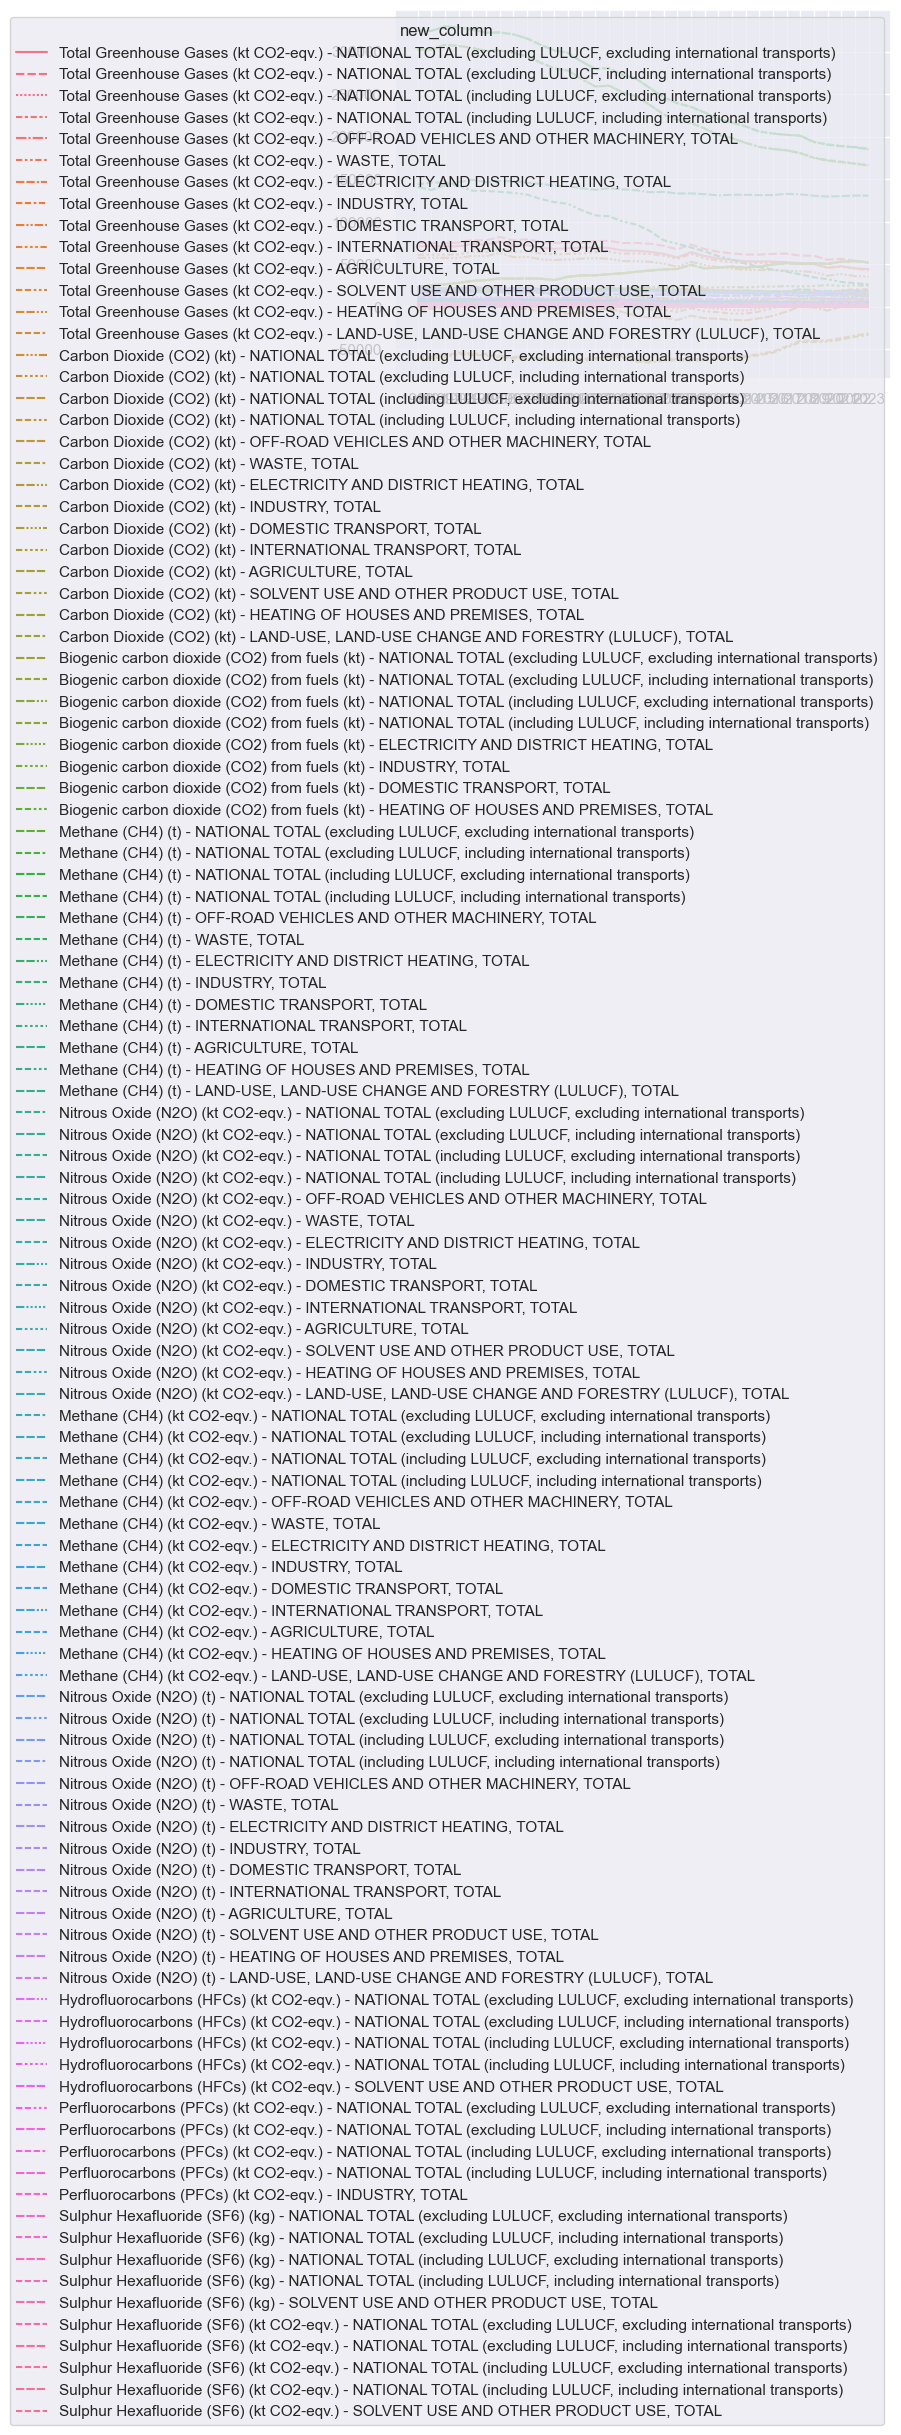

In [601]:
sns.lineplot(data=df_t_n)

Well... we have too much data, first let's remove the legend to see something.

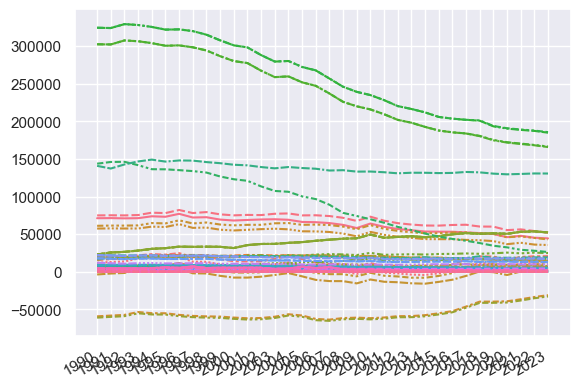

In [602]:
# Your lineplot
g = sns.lineplot(data=df_t_n)
g.figure.autofmt_xdate()
plt.legend().remove()


Let's only plot the total greenhouse gas and get a bigger plot

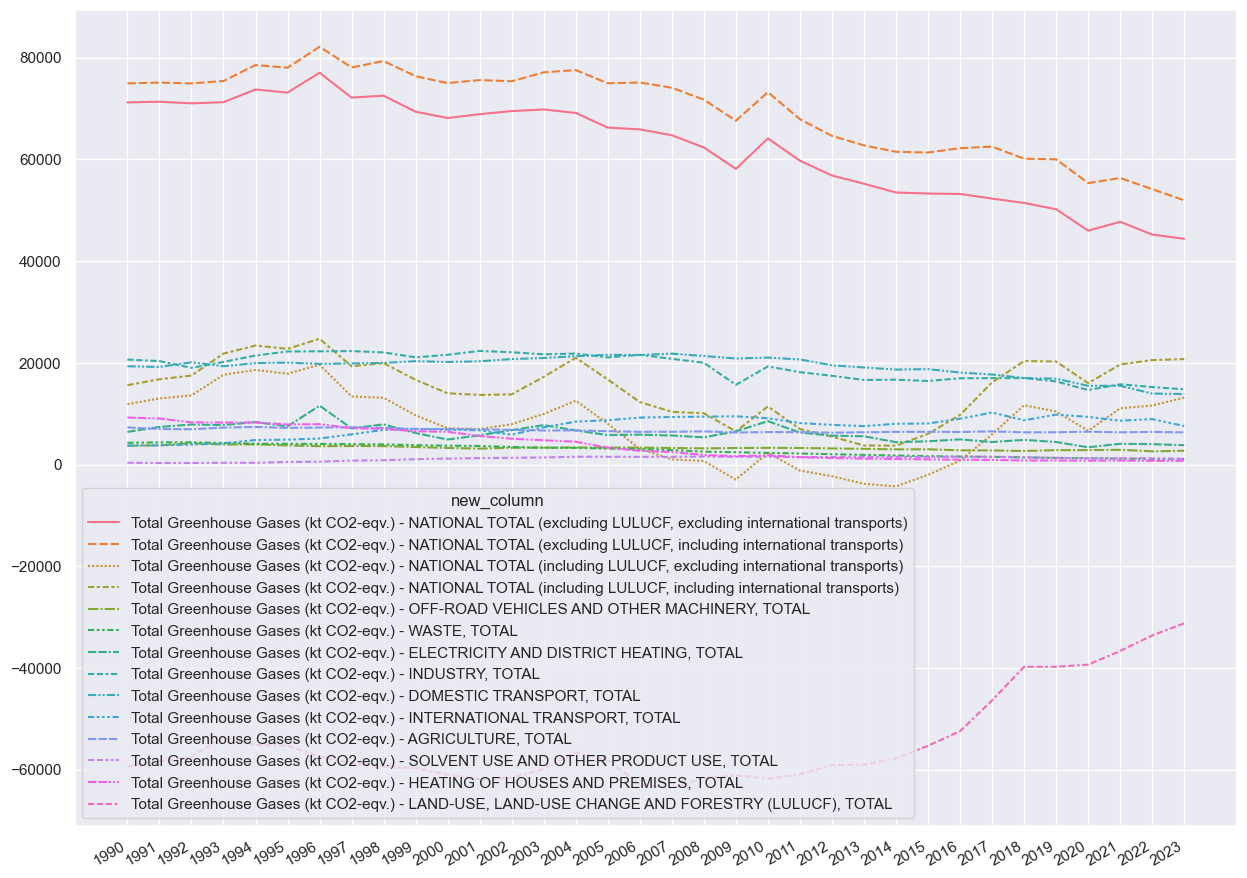

In [603]:
plt.figure(figsize=(15, 12))
df_t_n_cut = df_t_n.iloc[:, :14]
g = sns.lineplot(data=df_t_n_cut)
g.figure.autofmt_xdate()

We see that a lot of line stay between 0 and 20k and don't evolve much. We also see that there is a line that goes in the negative. The extreme slowly go toward 0, which is unfortunate for the LAND USE as it absorb CO2 instead of emiting it.

## Controlling figure aesthetics (on a line plot)
As shown above, our line plot is a bit hard to read, let's see how we can improve that.

In [604]:
def plot_gas():
    g = sns.lineplot(data=df_t_n_cut)
    g.figure.autofmt_xdate()
    # I don't want to deal with the legend rn
    plt.legend().remove()
    return g

<Axes: >

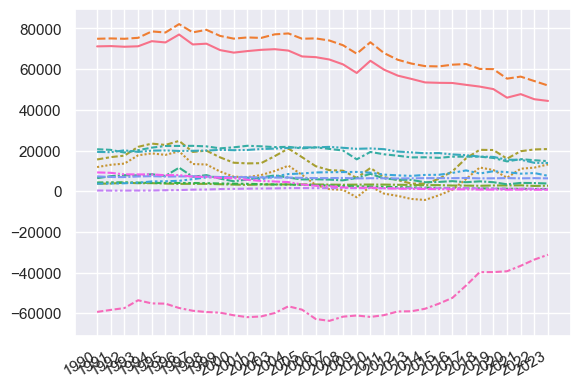

In [605]:
plot_gas()

All the lines are mixed, we can't read the date.

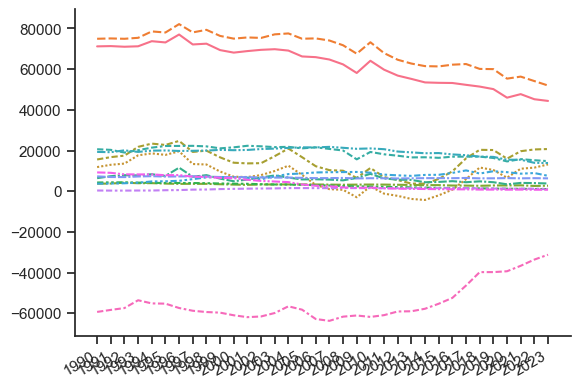

In [606]:
sns.set_style("ticks")
plot_gas()
sns.despine()

Maybe it's better if you're affraid of grey box. We need a larger plot.

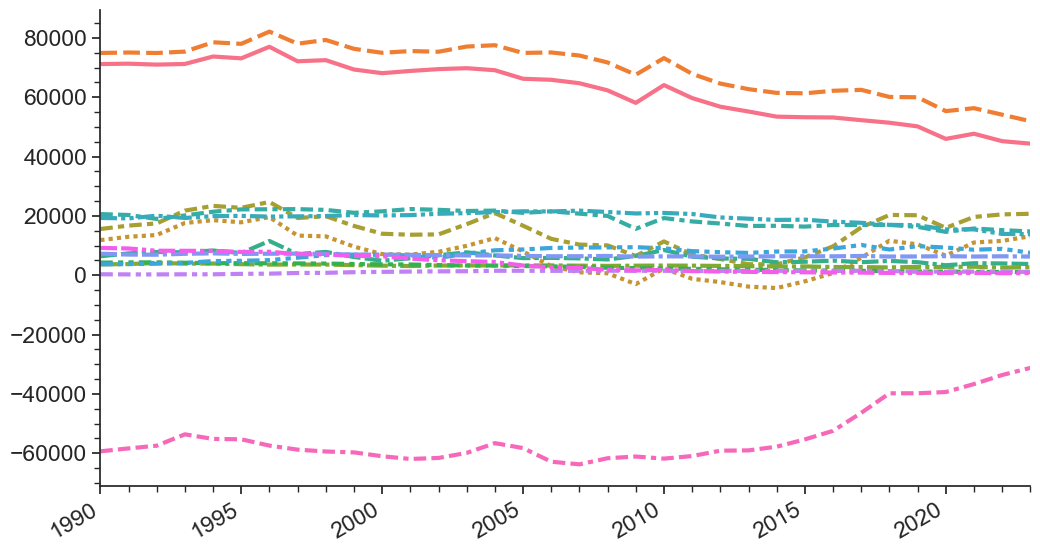

In [607]:
with sns.plotting_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3}):
    plt.figure(figsize=(12, 7))

    # I want to remove the margins on teh x axis, source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.margins.html
    plt.margins(x=0)

    # style and despine are still in effect because of the previous code cell but it put it back so there isn't any confusion
    sns.set_style("ticks")
    ax = plot_gas().figure.axes[0]
    sns.despine()

    ax.yaxis.set_major_locator(plt.MultipleLocator(20000))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(5000))

    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))


### other work on data

In [608]:
df = pd.read_csv(
    "../Total air emissions by greenhouse gas.csv",
    na_values=['..']
    )
df

,greenhouse gas,sector,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, excluding in...",71203.3,71338.8,71022.5,71242.7,73749.3,73135.2,77030.2,72145.4,...,53481.9,53283.7,53198.3,52294.3,51434.3,50196.4,45981.9,47721.8,45215.4,44386.0
1,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, including in...",74942.3,75103.8,74935.1,75408.3,78554.0,78019.4,82142.9,78075.2,...,61492.3,61348.7,62200.6,62518.3,60125.1,60011.4,55346.9,56335.5,54146.8,51956.4
2,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, excluding in...",11863.2,12988.4,13579.8,17635.4,18592.5,17858.9,19616.0,13375.8,...,-4299.4,-2033.0,756.6,5922.3,11653.5,10429.0,6630.6,11055.3,11601.4,13162.4
3,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, including in...",15602.2,16753.4,17492.4,21801.0,23397.2,22743.1,24728.6,19305.6,...,3710.9,6032.1,9758.9,16146.3,20344.3,20244.0,15995.5,19669.1,20532.8,20732.8
4,Total Greenhouse Gases (kt CO2-eqv.),"OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL",3682.5,3773.5,4176.6,3930.2,3962.2,3747.9,3605.7,3636.9,...,2971.8,2990.7,2791.1,2760.0,2659.3,2823.8,2828.2,2889.0,2592.0,2705.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"INTERNATIONAL TRANSPORT, TOTAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"AGRICULTURE, TOTAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"SOLVENT USE AND OTHER PRODUCT USE, TOTAL",81.4,81.6,81.4,78.1,82.2,111.0,87.5,121.3,...,31.1,37.0,38.8,34.0,34.0,35.3,38.2,39.6,38.6,38.0
152,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"HEATING OF HOUSES AND PREMISES, TOTAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### like I did on the first assignment, i will try to work with the waste data

#### i begin by some data cleaning

In [609]:
df_waste_total = df[df["sector"] == "WASTE, TOTAL"].sort_values(by="2023", ascending=False)
df_waste_total = df_waste_total.dropna()

# dropping useless sector column
df_waste_total = df_waste_total.drop(columns=["sector"])

# melting and pivoting for better intepretation
df_waste_total = df_waste_total.melt(id_vars=["greenhouse gas"], var_name="year", value_name="value")
df_waste_total = df_waste_total.pivot(index="year", columns="greenhouse gas", values="value")

# dropping useless columns where it's in ton and not in kt
df_waste_total = df_waste_total.drop(columns=["Methane (CH4) (t)", "Nitrous Oxide (N2O) (t)"])
df_waste_total

greenhouse gas,Carbon Dioxide (CO2) (kt),Methane (CH4) (kt CO2-eqv.),Nitrous Oxide (N2O) (kt CO2-eqv.),Total Greenhouse Gases (kt CO2-eqv.)
year,,,,
1990,43.9,4025.2,206.0,4275.1
1991,52.2,4088.8,207.1,4348.1
1992,58.3,4095.2,207.9,4361.5
1993,48.0,3969.5,210.3,4227.9
1994,49.1,3819.4,212.9,4081.4
1995,42.7,3815.0,217.2,4074.9
1996,49.1,3784.1,213.0,4046.2
1997,50.6,3749.1,209.2,4008.9
1998,49.2,3694.3,207.2,3950.6


distribution of the data for the Total Greenhouse Gases (kt CO2-eqv.)

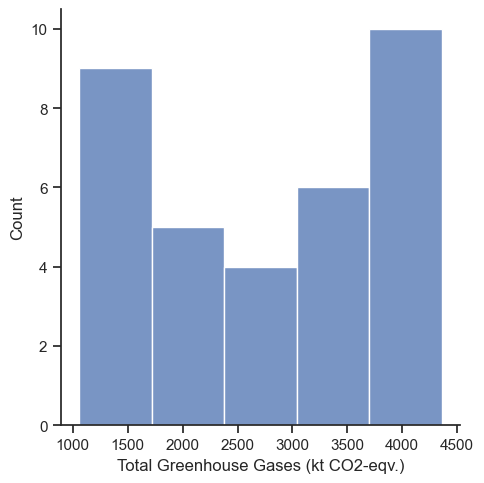

In [610]:
sns.displot(data=df_waste_total, x="Total Greenhouse Gases (kt CO2-eqv.)", bins=5);

## trying an historical plot for Total greenhouse gases

<Axes: xlabel='year', ylabel='Total Greenhouse Gases (kt CO2-eqv.)'>

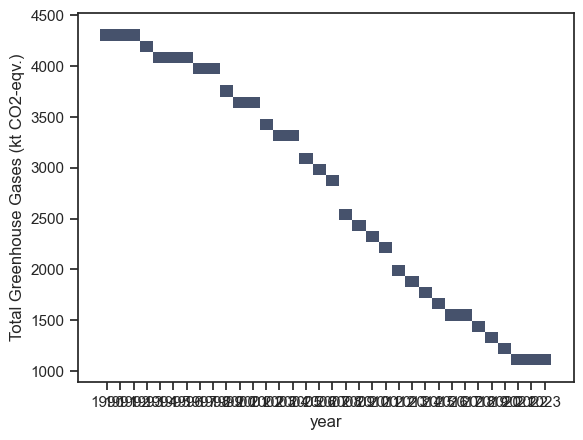

In [611]:
sns.histplot(data=df_waste_total, y="Total Greenhouse Gases (kt CO2-eqv.)", x="year", bins=30)

## trying a line plot for Total greenhouse gases. adapting the figure so i can see the year better

<Axes: xlabel='year', ylabel='Total Greenhouse Gases (kt CO2-eqv.)'>

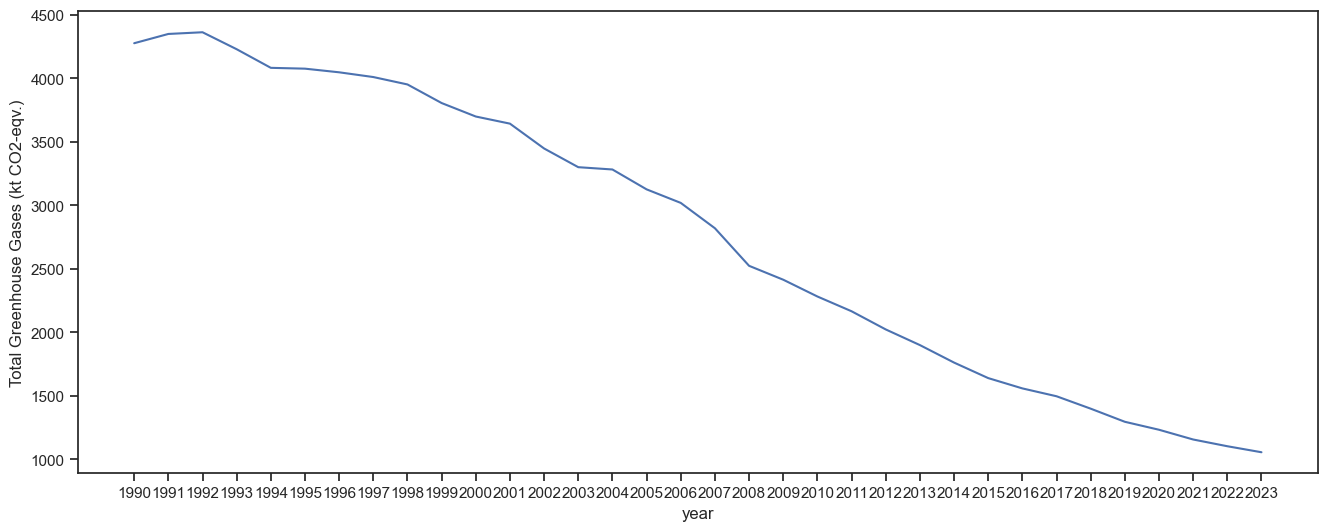

In [612]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_waste_total, x="year", y="Total Greenhouse Gases (kt CO2-eqv.)")

## lets try to add multiple lines

Text(0, 0.5, 'kiloton')

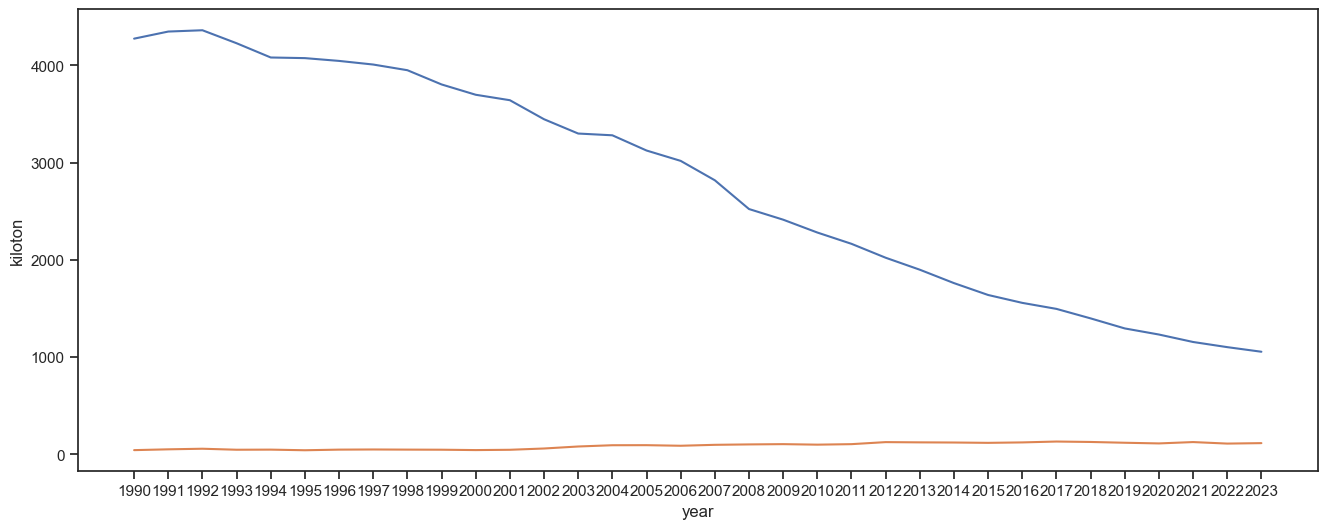

In [613]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_waste_total, x="year", y="Total Greenhouse Gases (kt CO2-eqv.)")
sns.lineplot(data=df_waste_total, x="year", y="Carbon Dioxide (CO2) (kt)")
plt.ylabel("kiloton")


## lets create a function to automatically add lineplot, with a choosen color

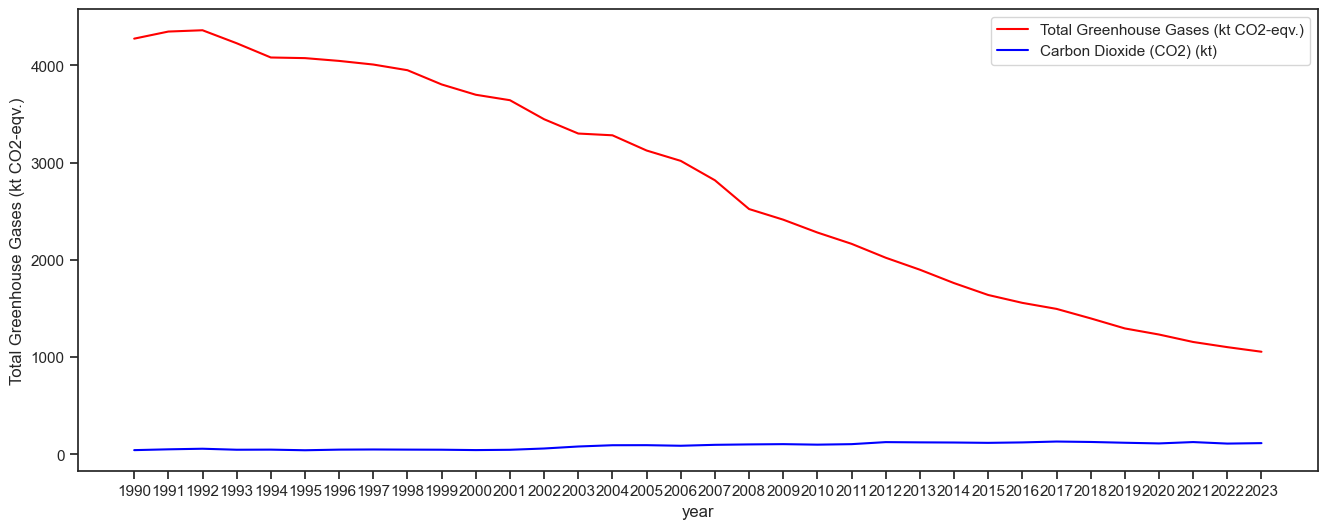

In [614]:
def add_lineplot(name, color):
    sns.lineplot(data=df_waste_total, x="year", y=name, label=name, color=color)

plt.figure(figsize=(16, 6))
add_lineplot("Total Greenhouse Gases (kt CO2-eqv.)", "red")
add_lineplot("Carbon Dioxide (CO2) (kt)", "blue")

## lets get the columns of our datafram as a list. then let's choose which color we want for each line. then creating a list of tuple with the column name and the choosen color.

In [615]:
columns = list(df_waste_total.columns)

colors = ["purple", "blue", "yellow", "red"]

column_color_pairs = []

i = 0
for column in columns :
    column_color_pairs.append([column, colors[i]])
    i += 1

column_color_pairs


[
    ['Carbon Dioxide (CO2) (kt)', 'purple'],
    ['Methane (CH4) (kt CO2-eqv.)', 'blue'],
    ['Nitrous Oxide (N2O) (kt CO2-eqv.)', 'yellow'],
    ['Total Greenhouse Gases (kt CO2-eqv.)', 'red']
]

## lets create a function that take this list of tuples and create a plot based on it 

In [616]:
def create_lineplot(columns):
    plt.figure(figsize=(16, 6))
    for column in columns:
        add_lineplot(column[0], column[1])  # column[0] is the column name, column[1] is the color
    plt.legend(title='Indicators')
    plt.ylabel("kiloton")
    plt.show()

## testing

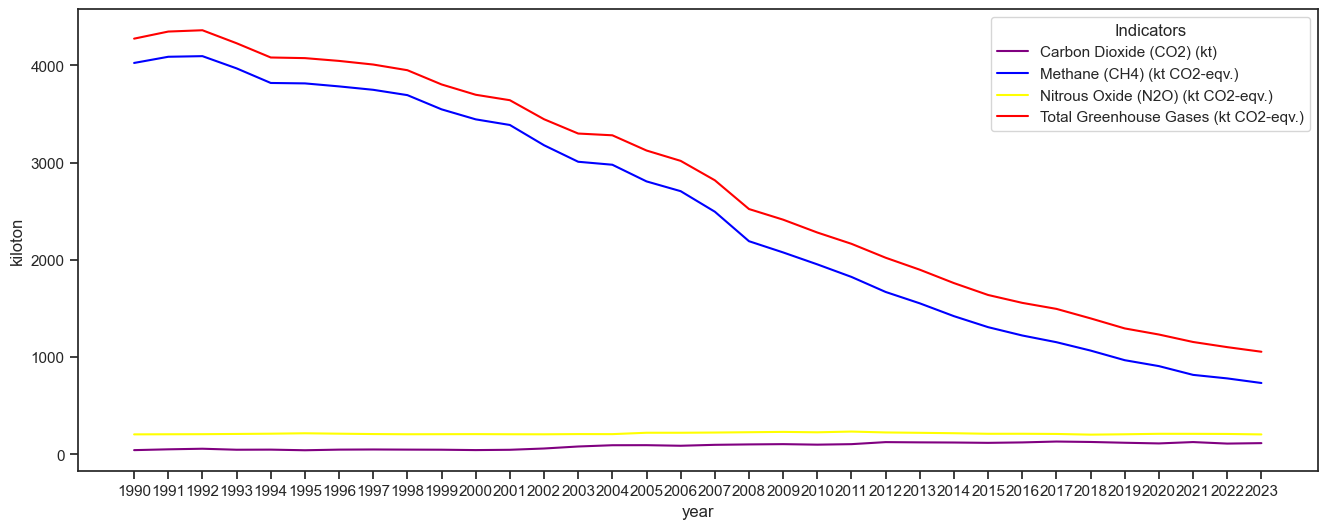

In [617]:
create_lineplot(column_color_pairs)

## let's now use a color palette from seaborn directly

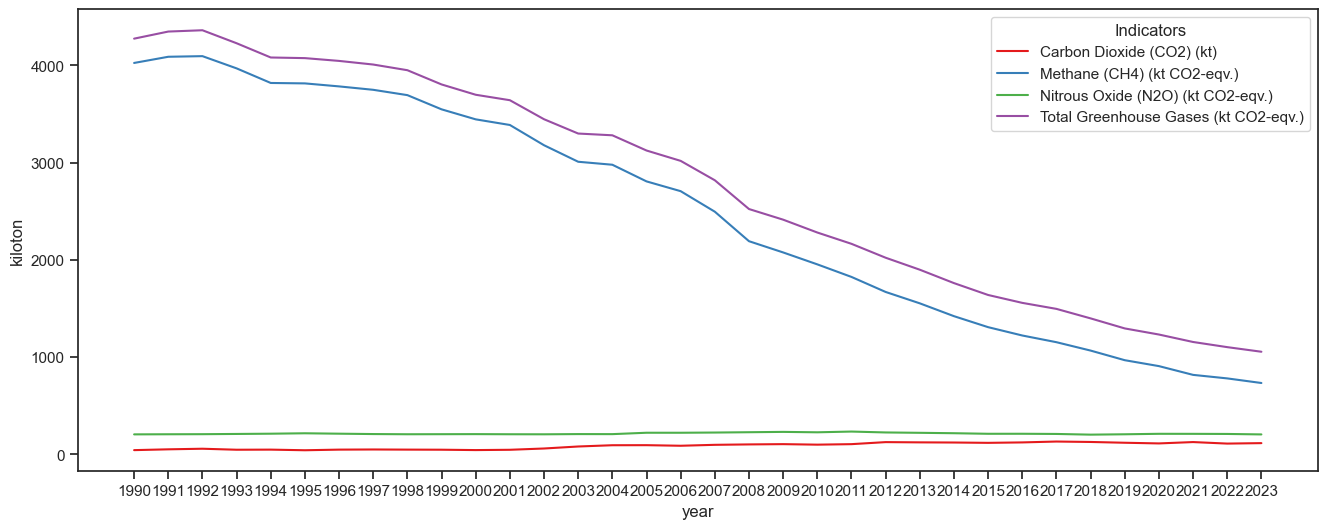

In [618]:
pal = sns.color_palette("Set1", n_colors=len(columns))
pal

columns = list(df_waste_total.columns)
column_color_pairs = [[col, pal[i]] for i, col in enumerate(columns)]

create_lineplot(column_color_pairs)

## another set : 

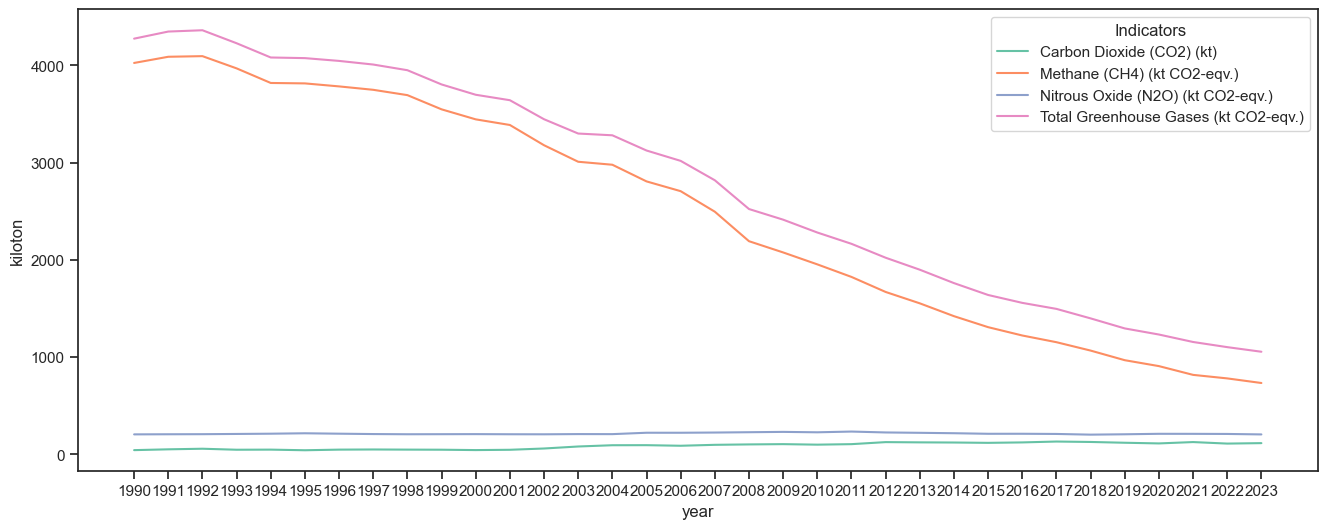

In [619]:
pal = sns.color_palette("Set2", n_colors=len(columns))
pal

columns = list(df_waste_total.columns)
column_color_pairs = [[col, pal[i]] for i, col in enumerate(columns)]

create_lineplot(column_color_pairs)

## let's do the same for scatter plot

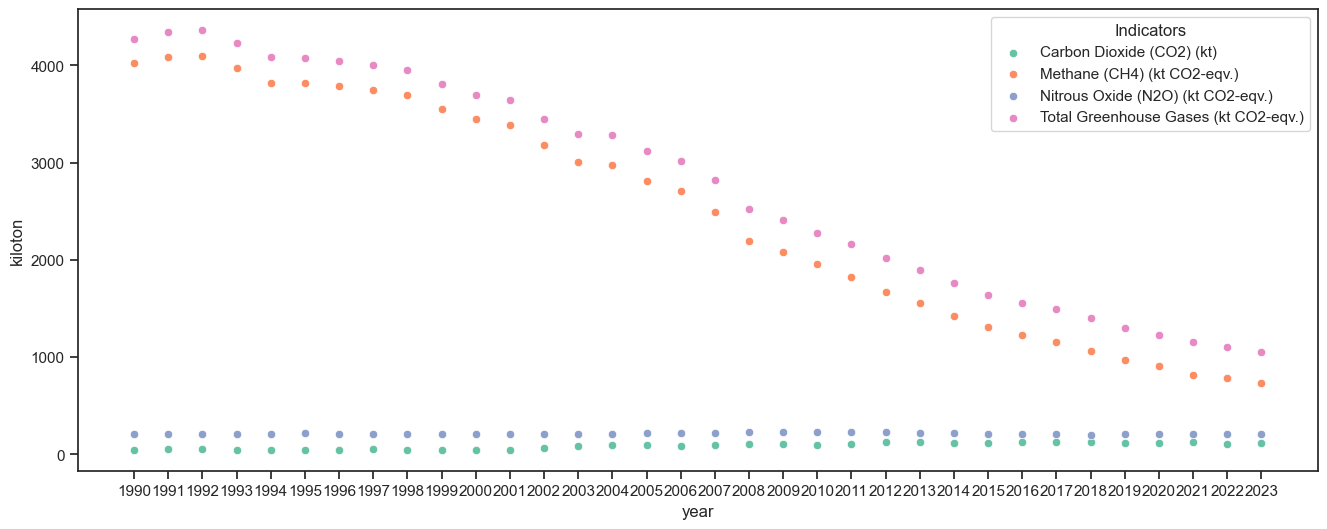

In [620]:
sns.set_style("ticks")

def add_scatterplot(name, color):
    sns.scatterplot(data=df_waste_total, x="year", y=name, label=name, color=color)

def create_scatterplots(columns):
    plt.figure(figsize=(16, 6))
    for column in columns:
        add_scatterplot(column[0], column[1])  # column[0] is the column name, column[1] is the color
    plt.legend(title='Indicators')
    plt.ylabel("kiloton")
    plt.show()


create_scatterplots(column_color_pairs)
